### Prediction of price for second hand cars using `Regression`

#### Imports

In [28]:
import tensorflow as tf
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError, Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import numpy as np

#### Read Data

In [2]:
data = pd.read_csv("SecondHandCarDataSet.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


#### Data Processing

In [14]:
tensor_data = tf.constant(data)
tensor_data = tf.random.shuffle(tensor_data)

In [4]:
X = tensor_data[:, 3:-1]
Y = tensor_data[:,-1]
Y = tf.expand_dims(Y,axis=-1)

In [5]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.1
VALIDATION_RATIO = 0.1
DATASET_SIZE = len(data)

In [6]:
#Training Data
x_train=X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train=Y[:int(DATASET_SIZE*TRAIN_RATIO)]

#Testing Data
x_test = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO))]
y_test = Y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO))]

#Validation Data
x_validate = X[int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO)):]
y_validate = Y[int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO)):]

In [7]:
normalizer = Normalization()
normalizer.adapt(x_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.31143883, -0.20399505, -0.7042375 ,  0.12467095,  1.4912955 ,
        -0.25308987, -0.94728994,  0.96431506],
       [ 1.4268247 , -0.89108133, -0.7042375 , -1.3103908 ,  0.147786  ,
         1.3051862 ,  1.3975778 , -0.40359145],
       [-1.4702811 , -0.63859844, -0.7042375 , -0.23409452,  0.5956225 ,
        -0.8764003 , -0.31222162,  1.2473302 ],
       [-0.31143883,  1.494495  ,  1.4164277 , -0.59286   , -0.30005047,
        -1.6555383 ,  0.22514391, -0.12057631],
       [ 1.4268247 ,  0.430191  ,  0.7095393 , -0.23409452, -0.74788696,
         0.21439295,  1.1044693 ,  0.44545397]], dtype=float32)>

#### Creating a model

In [8]:
model = tf.keras.Sequential(
    [
        InputLayer(shape=(8,)),
        normalizer,
        Dense (1) ,
    ]
)
model. summary ()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)

In [9]:
model.compile(
    optimizer= Adam(learning_rate=1.0),
    loss = MeanAbsoluteError(),
    metrics= [RootMeanSquaredError()]
)

In [15]:
history = model.fit(x_train,y_train, validation_data=(x_validate,y_validate),epochs=100,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 312089.2188 - root_mean_squared_error: 335280.3750 - val_loss: 318218.9375 - val_root_mean_squared_error: 336432.5938
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 302767.4688 - root_mean_squared_error: 327140.6562 - val_loss: 318194.4375 - val_root_mean_squared_error: 336409.2188
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 304110.5000 - root_mean_squared_error: 329211.1250 - val_loss: 318169.4375 - val_root_mean_squared_error: 336386.5625
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 302016.6562 - root_mean_squared_error: 327348.3125 - val_loss: 318144.2188 - val_root_mean_squared_error: 336363.3125
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 305142.7812 - root_mean_squared_error: 328623.0312 - val_loss: 318119.6562 - val_root_mean_squared_error: 336341.1562
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 306537.4688 - root_mean_squared_error: 330952.5312 - val

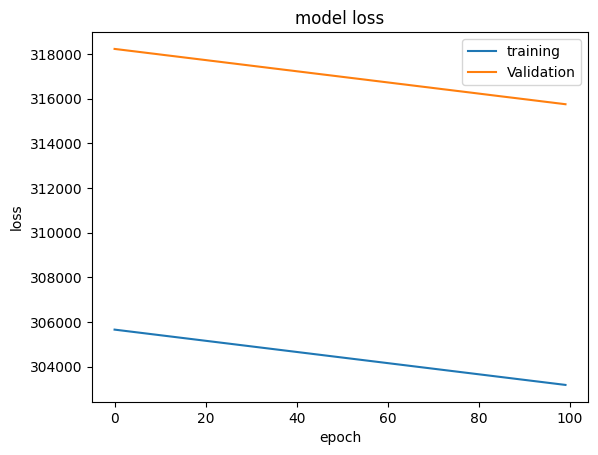

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training','Validation'])
plt.show()

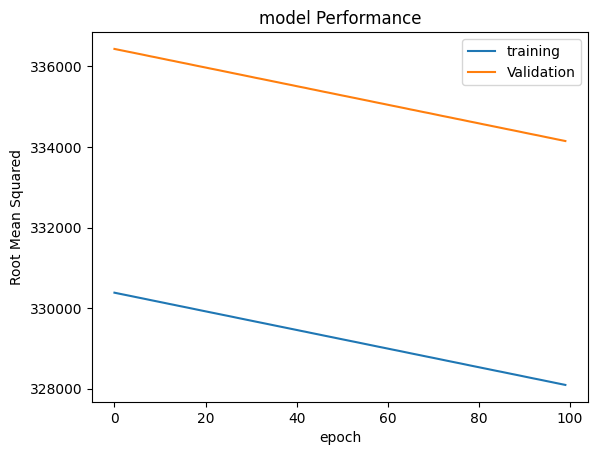

In [19]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model Performance')
plt.ylabel('Root Mean Squared')
plt.xlabel('epoch')
plt.legend(['training','Validation'])
plt.show()

In [18]:
 model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 310608.8438 - root_mean_squared_error: 322981.7812 


[330766.25, 327516.09375]

In [21]:
model.predict(tf.expand_dims(x_test[0], axis = 0 ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


array([[5001.3994]], dtype=float32)

In [22]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([197320.])>

In [23]:
y_true = list(y_test[:,0] .numpy())

In [25]:
y_pred = list(model. predict(x_test) [:,0])
print (y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[5001.3994, 4993.801, 4988.191, 4987.9355, 5003.65, 4998.497, 4997.934, 5005.146, 5001.4214, 5004.3574, 4995.452, 5012.0825, 5000.0757, 5000.1445, 5002.946, 4993.4106, 5002.968, 5004.13, 4999.1475, 5003.3457, 4991.0635, 4998.313, 5002.099, 5006.0684, 4999.2285, 5010.8457, 5003.5825, 4998.6436, 5000.5312, 5000.7114, 4997.038, 5005.1343, 4996.889, 5004.431, 5000.451, 4999.2866, 5001.405, 5008.1187, 4991.1357, 4993.483, 4996.511, 5004.135, 5001.1035, 4998.7227, 5003.9673, 4990.93, 4998.06, 5008.842, 4992.999, 4999.589, 5011.395, 4996.9346, 5009.084, 5003.989, 4997.4307, 4997.7075, 4992.0156, 4996.5396, 4996.7603, 4999.848, 4990.2007, 5002.1616, 5010.5464, 4997.88, 4998.741, 5006.5312, 4993.4897, 5000.107, 5001.199, 5001.1797, 5006.378, 4991.13, 4994.825, 5006.4907, 4997.6685, 4995.6685, 4985.9673, 4992.9, 4992.8457, 5003.173, 4991.0996, 4996.1, 5008.9067, 4994.16, 5004.359, 4999.5376, 4992.804, 5003.6953, 4992.5425, 4999.609, 5007.25, 5005.4536, 5010.

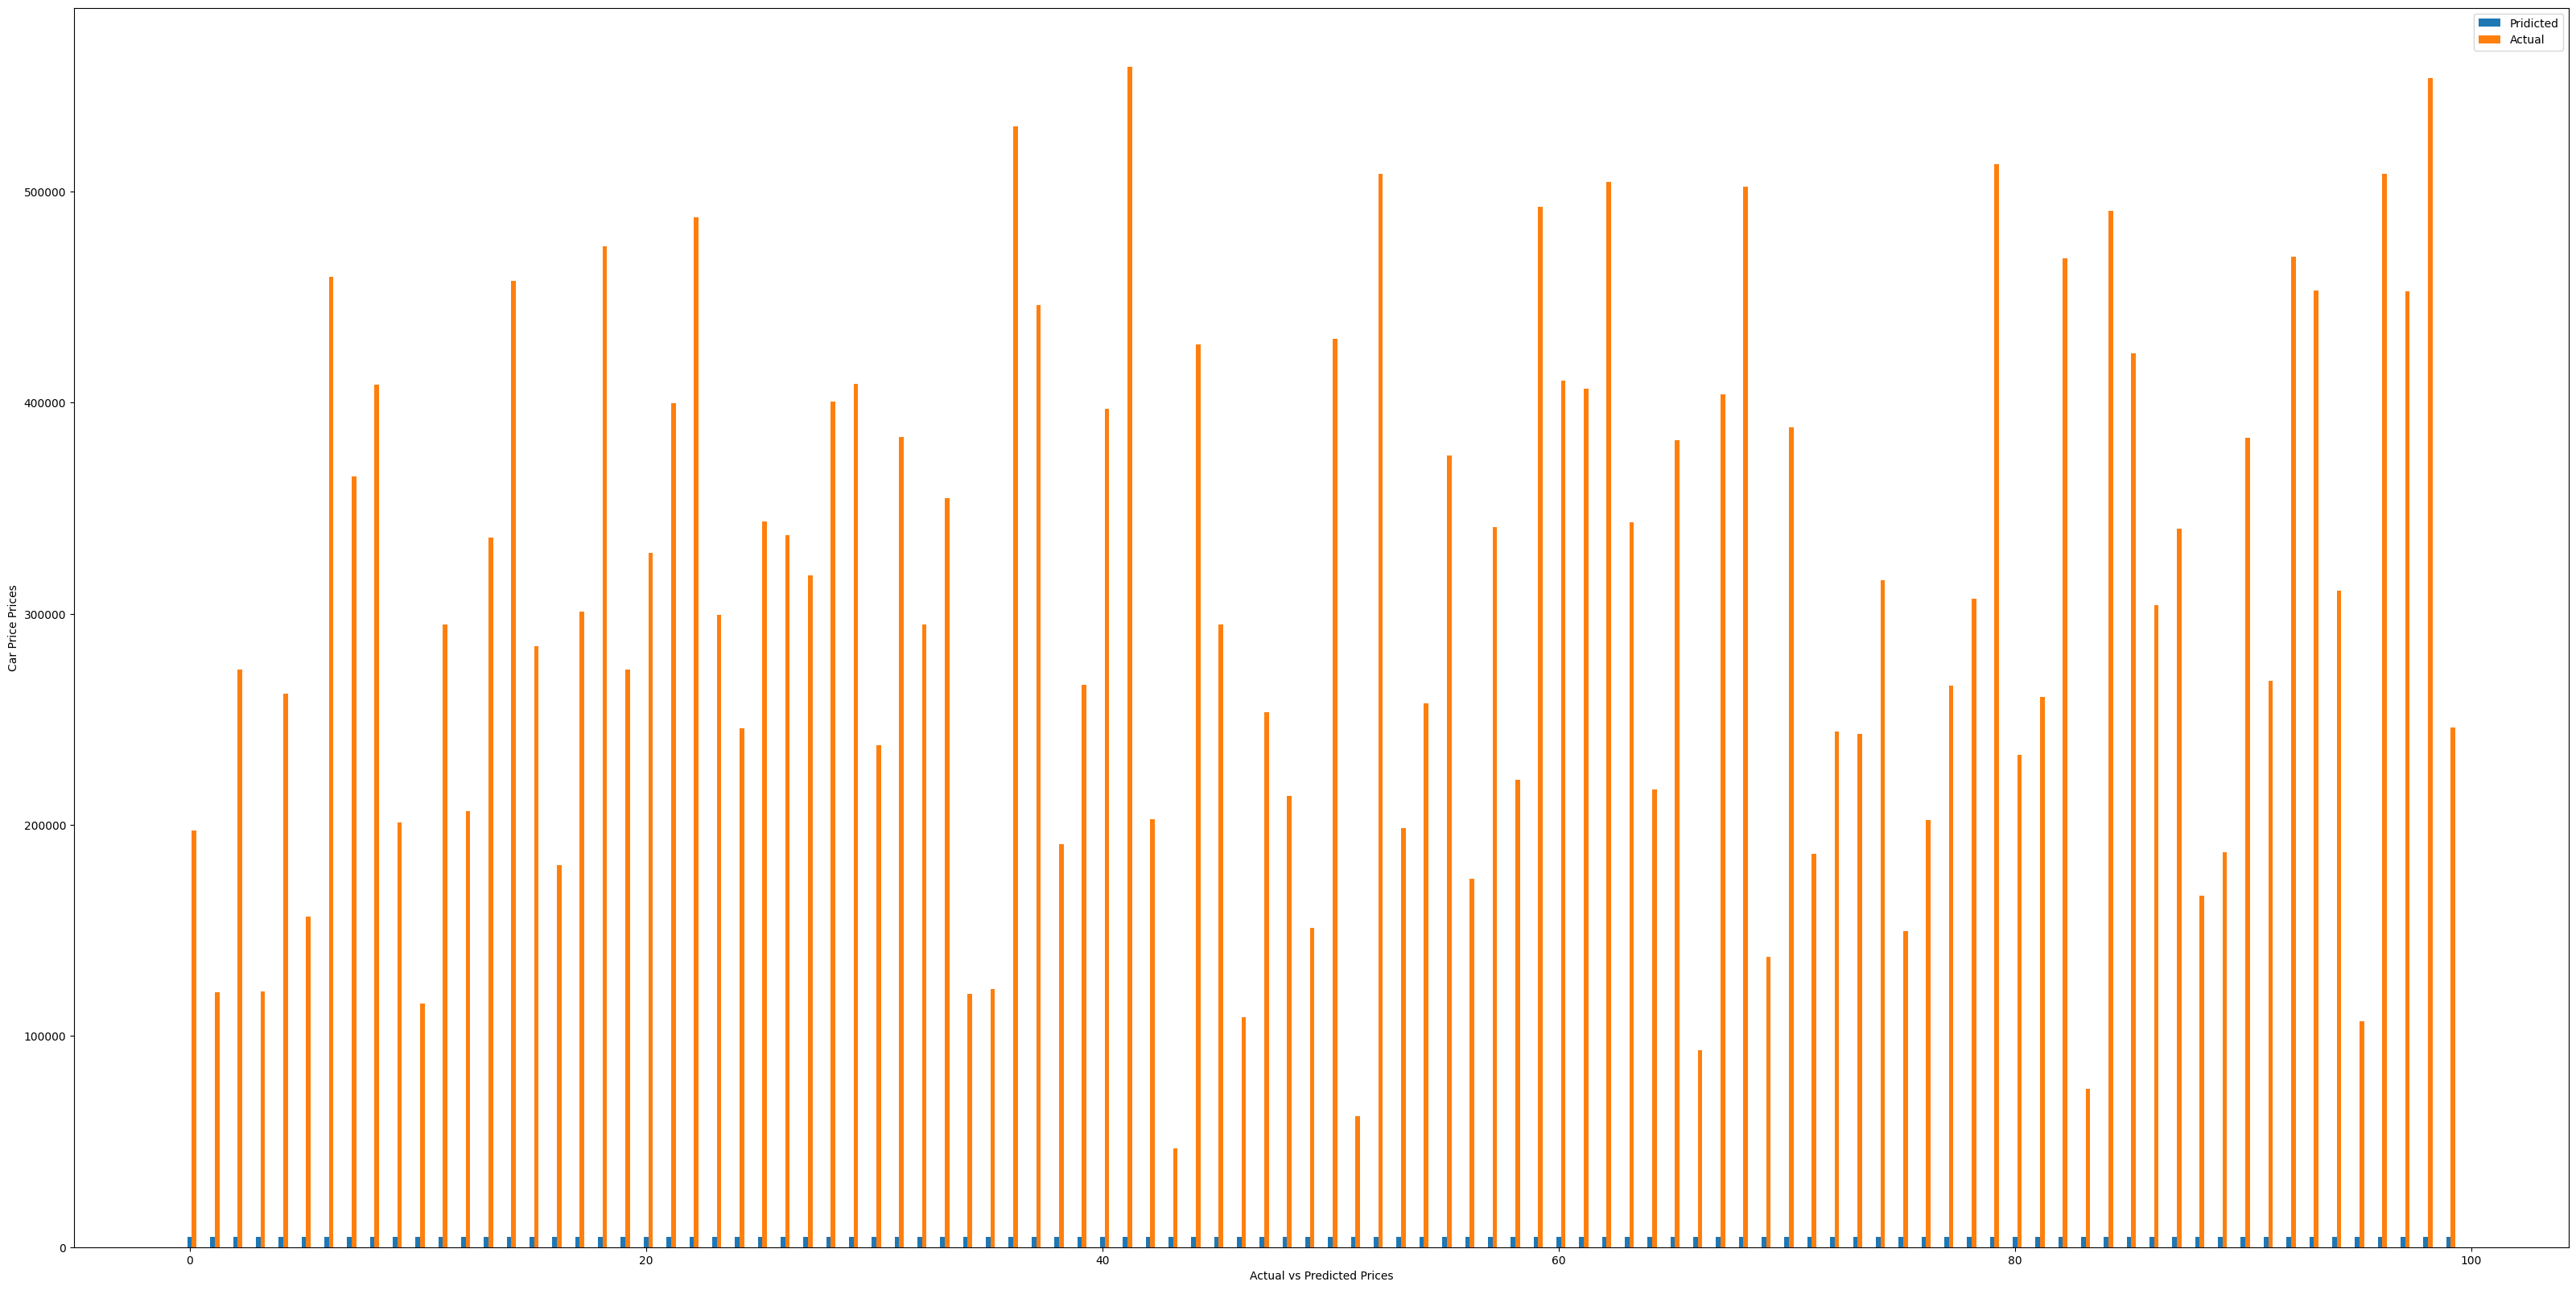

In [48]:
ind = np.arange (100)
plt. figure(figsize=(40,20))
width = 0.2
plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')
plt.xlabel('Actual vs Predicted Prices')
plt.ylabel( 'Car Price Prices')
plt.legend(['Pridicted','Actual'])
plt.show()